## 1. Connexion à la base de données

In [2]:
import pandas as pd
import database
import matplotlib.pyplot as plt
import seaborn as sns
import re

df = database.main()
df.drop_duplicates(keep='first', inplace=True)
# Load keywords from a CSV file without headers
keywords_df = pd.read_csv('skills.csv', header=None)  # Replace 'skills.csv' with your file path
keyword_list = keywords_df[0].tolist()

# Function to find keywords in the description
def find_keywords(description, skills_list):
    contained_skills = []
    for skill in skills_list:
        # Create a regex pattern that matches the skill with word boundaries
        pattern = r'\b' + re.escape(skill) + r'\b'
        if re.search(pattern, description, re.IGNORECASE):
            contained_skills.append(skill)
    if len(contained_skills) == 0:
        return None
    else:
        return ', '.join(contained_skills)

# Apply the function to create the new column
df['skills'] = df['description'].apply(lambda desc: find_keywords(desc, keyword_list))
df.head()

,title,company,description,location,via,extensions,employment_type,work_mode,posting_date,degree_requirement,salary,posted_at_timestamp,skills
0,Data Analyst internship,PGBPGNGLOBAL,,"Paris, France",via PG Careers,"{""Full-time and Internship""}",Full-time and Internship,None,None,None,None,NaT,None
1,Senior Data Analyst H/F,Qonto,Les missions du poste\n\nOur mission? Making d...,Anywhere,via HelloWork,"{""9 hours ago"",""Work from home"",Full-time,""9 h...",Full-time,Work from home,9 hours ago,None,None,2024-02-13 01:54:19.019501,"sql, python, go, snowflake, airflow, tableau"
2,Data Analyst,Jump,"Pour relever ces défis, nous recrutons un·e Da...","Paris, France",via Welcome To The Jungle,"{""18 hours ago"",Full-time,""18 hours ago"",Full-...",Full-time,None,18 hours ago,None,None,2024-02-12 16:54:19.019501,None
3,Data analyst,Oh BiBi,Job Description:\n\nAs a Data Analyst at OhBiB...,"Paris, France",via Indeed,"{""4 days ago"",Full-time,""4 days ago"",Full-time}",Full-time,None,4 days ago,None,None,2024-02-09 10:54:19.019501,"sql, python, aws, redshift, looker"
4,Product Data Analyst,leboncoin,"The right career for all\n\nCreated in 2006, l...","Paris, France",via LinkedIn,"{""24 hours ago"",Full-time,""No degree mentioned...",Full-time,None,24 hours ago,No degree mentioned,None,2024-02-12 10:54:19.019501,"sql, python"


In [6]:
# Function to parse and standardize salary
def standardize_salary(salary):
    if salary is None:
        return None
    
    # Find all numbers in the salary string
    numbers = [float(num.replace('K', '000')) for num in re.findall(r'[\d.]+K?|[\d,]+', salary.replace(',', ''))]
    
    # Determine the salary period and calculate annual salary
    if 'a month' in salary:
        annual_salary = int(sum(numbers) / len(numbers) * 12) # Average if a range, then convert to annual
    elif 'a day' in salary:
        annual_salary = int(sum(numbers) / len(numbers) * 220)  # Average if a range, then convert to annual
    elif 'a year' in salary:
        annual_salary = int(sum(numbers) / len(numbers))  # Average if a range
    else:
        annual_salary = None  # Undefined period
    
    return annual_salary

# Apply the function to each salary
df['salary_standardized'] = [standardize_salary(s) for s in df.salary]
# Filter out rows with no salary
df_salary = df[df['salary_standardized'].notnull()]
df_salary

,title,company,description,location,via,extensions,employment_type,work_mode,posting_date,degree_requirement,salary,posted_at_timestamp,skills,salary_standardized
6,Data Analyst Intern,Data&Data,Data&Data leverages artificial intelligence to...,"Paris, France",via Wellfound,"{""18 days ago"",""€8K–€18K a year"",Internship,""1...",Internship,None,18 days ago,None,€8K–€18K a year,2024-01-26 10:54:19.019501,"sql, python, r",13000.0
24,Data Analyst(f/m/d),wefox,wefox is a world-leading insurtech company dri...,"Paris, France",via Ai-Jobs.net,"{""12 days ago"",""65,750–105,000 a year"",""Full-t...",Full-time and Temp work,None,12 days ago,None,"65,750–105,000 a year",2024-02-01 10:54:19.019501,"sql, python, snowflake, airflow",85375.0
38,Data Analyst,Procter & Gamble,Job LocationParisJob DescriptionAre you energi...,"Asnières-sur-Seine, France",via Ai-Jobs.net,"{""4 days ago"",""71K–112K a year"",Full-time,""4 d...",Full-time,None,4 days ago,None,71K–112K a year,2024-02-09 10:54:19.019501,"sql, python",91500.0
41,Data Intelligence Analyst,Ralph Lauren,Ralph Lauren Corporation (NYSE:RL) is a global...,"Paris, France",via Karkidi,"{""€75K–€120K a year"",Full-time,""No degree ment...",Full-time,None,None,No degree mentioned,€75K–€120K a year,NaT,None,97500.0
45,Data Analyst H/F,EPSA,Description de l'entrepriseEPSA Market Place e...,"Paris, France",via Ai-Jobs.net,"{""24 days ago"",""68K–112K a year"",""Full-time an...",Full-time and Temp work,None,24 days ago,None,68K–112K a year,2024-01-20 10:57:02.851770,excel,90000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1906,Data Analyst,Shift Technology,Did you know that about 10% of all insurance p...,"Paris, France",via BeBee,"{""1 day ago"",""€50K–€80K a year"",Full-time,""1 d...",Full-time,None,1 day ago,None,€50K–€80K a year,2024-02-24 13:16:39.867425,"sql, c",65000.0
1909,Data Analyst,Dailymotion,Job Description\n\nAs an Insight Analyst on th...,"Paris, France",via BeBee,"{""2 days ago"",""€40K–€60K a year"",Full-time,""2 ...",Full-time,None,2 days ago,None,€40K–€60K a year,2024-02-23 13:16:39.867425,"sql, tableau",50000.0
1915,Business Analyst BI/Big Data,Cherry Pick,Cherry Pick est à la recherche d’un Business A...,"Paris, France",via Free-Work,"{""6 days ago"",""€450 a day"",Contractor,""No degr...",Contractor,None,6 days ago,No degree mentioned,€450 a day,2024-02-19 13:16:39.867425,"sql, c, power bi",99000.0
1923,Consultant Data Analyst H/F,Consort Group,Acteur de référence des systèmes d'information...,"Paris, France",via Jobijoba,"{""3 days ago"",""€42K–€55K a year"",Full-time,""No...",Full-time,None,3 days ago,No degree mentioned,€42K–€55K a year,2024-02-22 13:16:39.867425,c,48500.0


## 2. Salaire median pour les 5 compétences les plus demandées

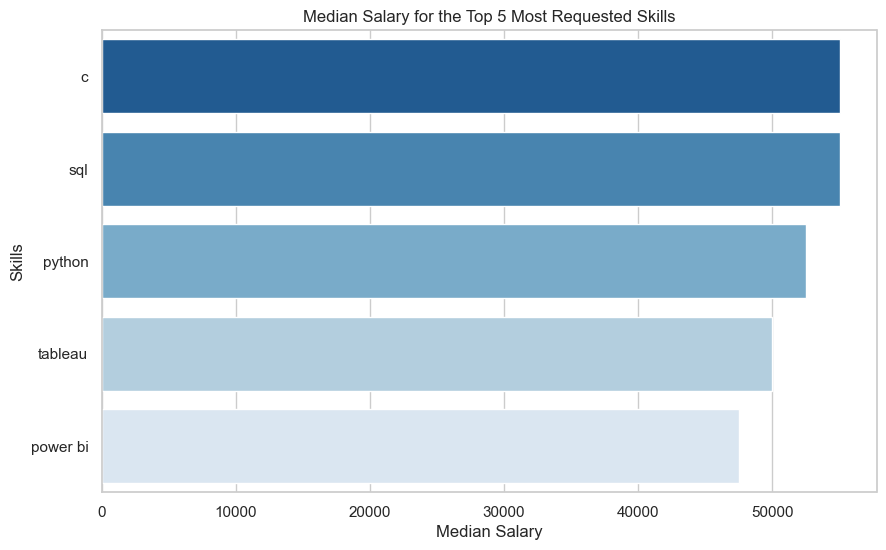

In [11]:
df_exploded = df.assign(skills=df.skills.str.split(", ")).explode('skills')

# Count the occurrence of each skill and get the top 5
top_skills = df_exploded['skills'].value_counts().head(5).index

# Filter for rows that have one of the top 5 skills
top_skills_df = df_exploded[df_exploded['skills'].isin(top_skills)]

# Calculate median salary for each of the top skills
median_salaries = top_skills_df.groupby('skills')['salary_standardized'].median().reset_index().sort_values(by='salary_standardized', ascending=False)

# Plotting the median salaries using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='salary_standardized', y='skills', data=median_salaries, palette="Blues_r")

plt.title('Median Salary for the Top 5 Most Requested Skills')
plt.xlabel('Median Salary')
plt.ylabel('Skills')

plt.show()

## 3. Ratio demande/salaire pour les compétences

In [8]:
# Step 1: Calculate frequency of each skill
skill_frequency = df_exploded['skills'].value_counts()

# Step 2: Calculate median salary for each skill
median_salary = df_exploded.groupby('skills')['salary_standardized'].median()

# Combine frequency and median salary into a single DataFrame
skills_data = pd.DataFrame({
    'frequency': skill_frequency,
    'median_salary': median_salary
})

# Step 3: Normalize the data
# Normalize by subtracting the min and dividing by the range
skills_data['frequency_normalized'] = (skills_data['frequency'] - skills_data['frequency'].min()) / (skills_data['frequency'].max() - skills_data['frequency'].min())
skills_data['median_salary_normalized'] = (skills_data['median_salary'] - skills_data['median_salary'].min()) / (skills_data['median_salary'].max() - skills_data['median_salary'].min())

# Step 4: Score each skill
# Here we simply average the normalized frequency and normalized median salary, but you can adjust the weighting
skills_data['score'] = (skills_data['frequency_normalized'] + skills_data['median_salary_normalized']) / 2

# Sort the skills by their score in descending order to identify the top skills
top_skills_by_score = skills_data.sort_values(by='score', ascending=False)

top_skills_by_score = top_skills_by_score.head(10)

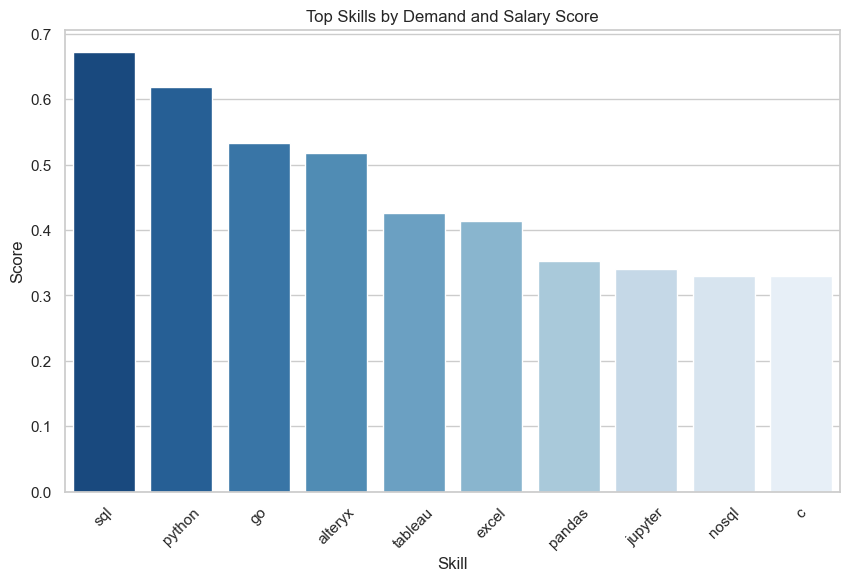

In [9]:
# Plotting the top skills by their score as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=skills_data.index, y='score', data=skills_data, order=top_skills_by_score.index, palette="Blues_r")
plt.title('Top Skills by Demand and Salary Score')
plt.xlabel('Skill')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()